# Ford GoBike System Data 2017v

# Investigation Overview

In this project, we have dataset from 2017 about bikes that have been rented to people , in this data we will investigate what features can affected rides in our data like which month is the most rented, and the type of people that rented the bikes from our system 

## Dataset Overview

There are 519700 rides on bike in the dataset with 14 features (ride_id,rideable_type,started_at,ended_at,start_station_name, start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual , start_month) 

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
df=pd.read_csv('2017-fordgobike-tripdata-cleaned.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  start_month              519700 non-null  int64  
dtypes: f

# The relationship between the type of users:
in this section we can see that the subscribers rent more the customers

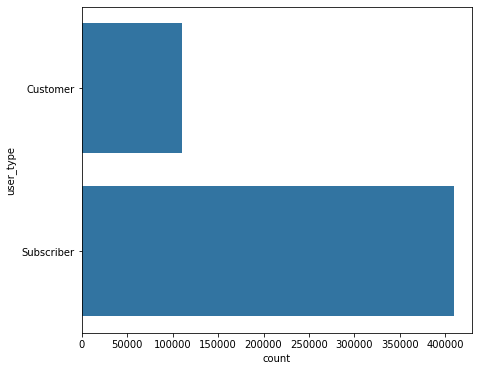

In [7]:
plt.figure(figsize = [7, 6])
base_color=sb.color_palette()[0]
sb.countplot(data=df,y='user_type',color=base_color);

# The bike trip durations:
We can see from this visual that the majority of trip durations are between 250 and 1000 (4.16min and 16.6min)

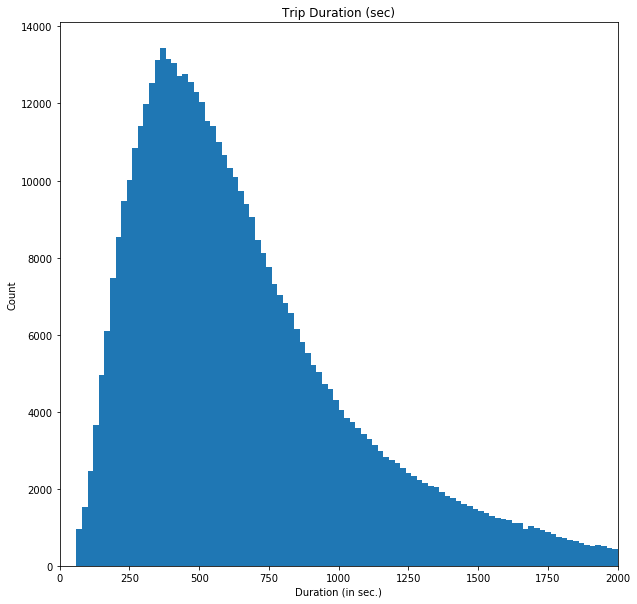

In [8]:
bins = np.arange(0, df['duration_sec'].max()+20, 20)
plt.figure(figsize=[10, 10])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim([0,2000]);
plt.xlabel('Duration (in sec.)')
plt.ylabel('Count')
plt.title("Trip Duration (sec)");

# The relationship between the user type and the duration trip
As Shown here that the customer was surprisingly higher than subscriber in term of the trip duration on the bike

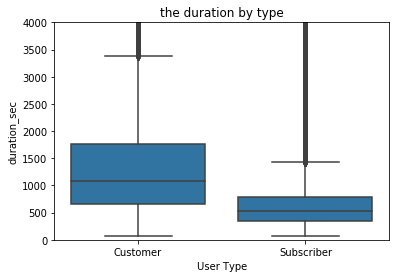

In [6]:
septemberbase_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec',
               color = base_color)
plt.ylim(0, 4000);
plt.xlabel('User Type');
plt.title('the duration by type');

# The relationship between the month and the user type
We see that subscriber increase from june to october and decreases, and the customer increase from june till september and decreases, also the the highest month for the subscriber was on october and the lowest was june and the highest month for the customer was on september and the lowest was in july

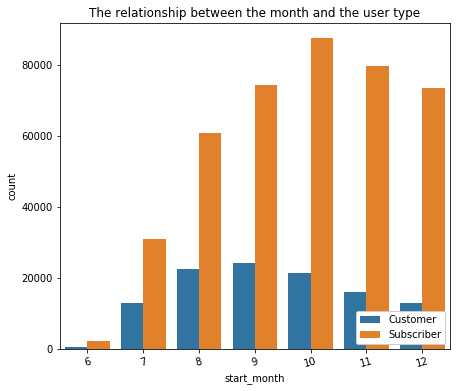

In [9]:
plt.figure(figsize = [7, 6])
ax = sb.countplot(data = df, x = 'start_month', hue = 'user_type')
ax.legend(loc = 4, framealpha = 1)
plt.xticks(rotation = 15)
plt.title("The relationship between the month and the user type");

# The relationship between The User, month and the trip duration
we see now that the subscriber spent less time than the customer on the bike and also for both users the least month was june 

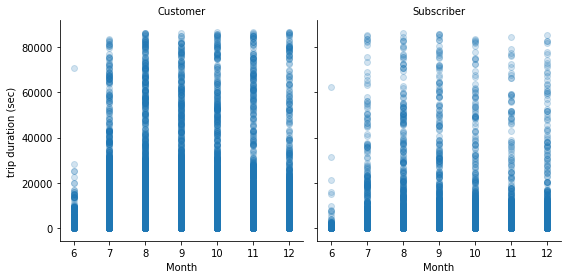

In [8]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 4,
                     col_wrap = 2)
g.map(sb.regplot, 'start_month', 'duration_sec', y_jitter = 0.04, fit_reg = False,
          scatter_kws = {'alpha' : 1/5})
g.set_ylabels('trip duration (sec)')
g.set_xlabels('Month')
g.set_titles('{col_name}');

In [10]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 396065 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\d7oom\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\d7oom\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\d7oom\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\d7oom\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\d7oom\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File